<a href="https://colab.research.google.com/github/ezahner/AI/blob/main/HW2/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>Erin Zahner <br> AI: HW 2 <br> Water Pitcher Problem</h3>


# **Start State**

* (0,0)
* Start with no water in either jug

# **Goal State**

* (4, y)
* **Goal:** have 4L in the 5L jug and any amount in the 3L

# **Rules**
* Fill the first jug to its capacity
* Fill the second jug to its capacity
* Empty the first jug
* Empty the second jug
* Pour water from the first jug to the second jug until either the first jug is empty or the second jug is full
* Pour water from the second jug to the first jug until either the first jug is full or the second jug is empty


# **Illegal States**
* negative amount of water in a jug
* exceeding bucket capacity

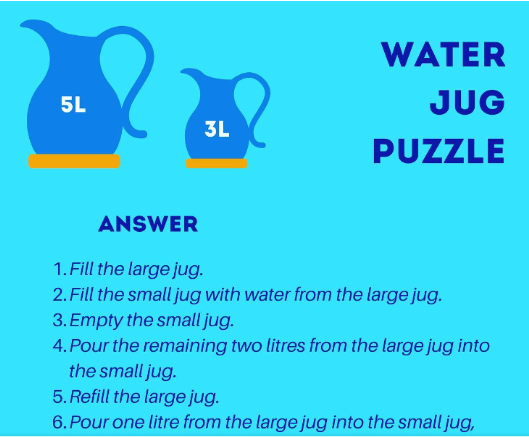

In [3]:
class WaterJugPuzzle():

   ####################################################################
   # Constructor with initial state
   ####################################################################

   def __init__(self):
    self.state = (0,0)
    self.saved_state = None

   ####################################################################
   # Illegal states
   ####################################################################

   # amount in jug is negative
   def is_negative_water_amount(self, new_state):
     return new_state[0] < 0 or new_state[1] < 0

  # amount in jug is greater than capacity
   def exceeds_jug_capacity(self, new_state):
     return new_state[0] > 5 or new_state[1] > 3

   def save_state(self):
    self.saved_state = self.state

   def state_ok(self, new_state):
    return not (self.is_negative_water_amount(new_state) or self.exceeds_jug_capacity(new_state))

   def undo_state(self):
     if self.saved_state is not None:
      self.state = self.saved_state
      self.saved_state = None



   ####################################################################
   # Rule 1: Fill the large jug
   ####################################################################

   def R1_fill1(self):
    new_state = (5, self.state[1])
    if self.state_ok(new_state):
      self.save_state()
      self.state = new_state
    else:
      self.undo_state
    return self.state

   ####################################################################
   # Rule 2: Fill the small jug
   ####################################################################

   def R2_fill2(self):
    new_state = (self.state[0], 3)
    if self.state_ok(new_state):
      self.save_state()
      self.state = new_state
    else:
      self.undo_state
    return self.state

   ####################################################################
   # Rule 3: Empty the large jug
   ####################################################################

   def R3_empty1(self):
    new_state = (0, self.state[1])
    if self.state_ok(new_state):
      self.save_state()
      self.state = new_state
    else:
      self.undo_state
    return self.state

   ####################################################################
   # Rule 4: Empty the small jug
   ####################################################################

   def R4_empty2(self):
    new_state = (self.state[0], 0)
    if self.state_ok(new_state):
      self.save_state()
      self.state = new_state
    else:
      self.undo_state
    return self.state

   ####################################################################
   # Rule 5: Pour water from the large jug to the small jug
   ####################################################################

   def R5_pour1to2(self):
    # calculate the maximum amount that can be poured without overflowing the small jug
    # diff represents the amount of water to be poured
    diff = min(self.state[0], 3 - self.state[1])
    new_state = (self.state[0] - diff, self.state[1] + diff)
    if self.state_ok(new_state):
      self.save_state()
      self.state = new_state
    else:
      self.undo_state
    return self.state

   ####################################################################
   # Rule 6: Pour water from the small jug to the large jug
   ####################################################################

   def R6_pour2to1(self):
    diff = min(self.state[1], 5 - self.state[0])
    new_state = (self.state[0] + diff, self.state[1] - diff)
    if self.state_ok(new_state):
      self.save_state()
      self.state = new_state
    else:
      self.undo_state
    return self.state



In [4]:
#print initial state
jug_puzzle = WaterJugPuzzle()
print("start state:", jug_puzzle.state)

#1. Fill the large jug (R1)
jug_puzzle.state = jug_puzzle.R1_fill1()
print("R1:", jug_puzzle.state)

#2. Fill the small jug with water from the large jug (R5)
jug_puzzle.state = jug_puzzle.R5_pour1to2()
print("R5:", jug_puzzle.state)

#3. Empty the small jug (R4)
jug_puzzle.state = jug_puzzle.R4_empty2()
print("R4:", jug_puzzle.state)

#4. Pour the remaining 2L from the large jug into the small jug (R5)
jug_puzzle.state = jug_puzzle.R5_pour1to2()
print("R5:", jug_puzzle.state)

#5. Refill the large jug (R1)
jug_puzzle.state = jug_puzzle.R1_fill1()
print("R1:", jug_puzzle.state)

#6. Pour 1L from the large jug into the small jug (R5)
jug_puzzle.state = jug_puzzle.R5_pour1to2()
print("goal state:", jug_puzzle.state)

start state: (0, 0)
R1: (5, 0)
R5: (2, 3)
R4: (2, 0)
R5: (0, 2)
R1: (5, 2)
goal state: (4, 3)
